## Analysis of spatial factors specific to one slice and their associated gene signatures

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap

import warnings
warnings.filterwarnings("ignore")

### Load results

In [2]:
res_path = "Results/INSPIRE_brain_different_views"
adata = sc.read_h5ad(res_path + "/adata_inspire.h5ad")
basis_df = pd.read_csv(res_path + "/basis_df_inspire.csv", index_col=0)

### Spatial distributions of spatial factors that are specific to a single slice

In [3]:
# load raw data with histological images
data_dir = "data/Visium_mouse_brain/Visium_sagittal-anterior2"
adata_st1 = sc.read_visium(path=data_dir,
                           count_file="V1_Mouse_Brain_Sagittal_Anterior_Section_2_filtered_feature_bc_matrix.h5")
adata_st1.var_names_make_unique()
adata_st1.obs.index = adata_st1.obs.index + "-0"

data_dir = "data/Visium_mouse_brain/Visium_sagittal-posterior2"
adata_st2 = sc.read_visium(path=data_dir,
                           count_file="V1_Mouse_Brain_Sagittal_Posterior_Section_2_filtered_feature_bc_matrix.h5")
adata_st2.var_names_make_unique()
adata_st2.obs.index = adata_st2.obs.index + "-1"

data_dir = "data/Visium_mouse_brain/Visium_coronal"
adata_st3 = sc.read_visium(path=data_dir,
                           count_file="V1_Adult_Mouse_Brain_filtered_feature_bc_matrix.h5")
adata_st3.var_names_make_unique()
adata_st3.obs.index = adata_st3.obs.index + "-2"

slice1_idx = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
slice2_idx = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
slice3_idx = "V1_Adult_Mouse_Brain"

In [4]:
for spatial_factor_index in [15,17,25]:
    adata_st1.obs["proportion-"+str(spatial_factor_index)] = adata[adata_st1.obs.index, :].obs["Proportion of spatial factor "+str(spatial_factor_index)].values
    adata_st2.obs["proportion-"+str(spatial_factor_index)] = adata[adata_st2.obs.index, :].obs["Proportion of spatial factor "+str(spatial_factor_index)].values
    adata_st3.obs["proportion-"+str(spatial_factor_index)] = adata[adata_st3.obs.index, :].obs["Proportion of spatial factor "+str(spatial_factor_index)].values

In [5]:
# adjust spatial locations of the three slices
ymax_1 = np.max(adata_st1.obsm["spatial"][:,1])
ymax_2 = np.max(adata_st2.obsm["spatial"][:,1])
ymax_3 = np.max(adata_st3.obsm["spatial"][:,1])

y_adjust_2to1 = ymax_1 - ymax_2
y_adjust_3to1 = ymax_1 - ymax_3

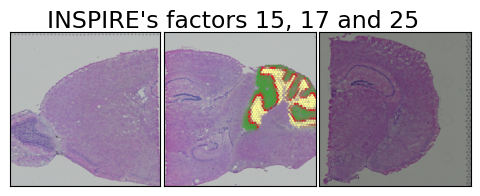

In [6]:
factor_list = ["15","17","25"]
color_list = ["#E31A1C","#33A02C","#FFFF99"]

fig = plt.figure(figsize=(6,2))
size = 1.


# slice 1
ax0 = fig.add_subplot(1, 3, 1)
ax0.imshow(adata_st1.uns["spatial"][str(slice1_idx)]['images']['lowres'])
ax0.set_aspect('equal')
x_coor = adata_st1.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st1.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
for i in range(len(factor_list)):
    ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c=color_list[i], alpha=adata_st1.obs["proportion-"+factor_list[i]])
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ymin, ymax = np.min(y_coor)-50, np.max(y_coor)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymax, ymin)
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

# slice 2
ax1 = fig.add_subplot(1, 3, 2)
ax1.imshow(adata_st2.uns["spatial"][str(slice2_idx)]['images']['lowres'])
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
for i in range(len(factor_list)):
    ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=color_list[i], alpha=adata_st2.obs["proportion-"+factor_list[i]])
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymax - y_adjust_2to1 * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef'], 
             ymin - y_adjust_2to1 * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef'])
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


# slice 3
ax2 = fig.add_subplot(1, 3, 3)
ax2.imshow(adata_st3.uns["spatial"][str(slice3_idx)]['images']['lowres'])
x_coor = adata_st3.obsm["spatial"][:, 0] * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st3.obsm["spatial"][:, 1] * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef']
for i in range(len(factor_list)):
    ax2.scatter(x_coor, y_coor, s=size, rasterized=True, c=color_list[i], alpha=adata_st3.obs["proportion-"+factor_list[i]])
ax2.set_aspect('equal')
ax2.set_xlim(xmin-0, xmax-0)
ax2.set_ylim(ymax - y_adjust_3to1 * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef'], 
             ymin - y_adjust_3to1 * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef'])
ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


fig.suptitle("INSPIRE's factors 15, 17 and 25", fontsize=17, y=.99)
fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.show()

### Identify top genes associated with these spatial factors in the cerebellum using gene loadings

In [7]:
factor_id = 14

factor_profile = np.array(basis_df.iloc[factor_id,:].values)
order = np.argsort(-factor_profile)

potential_marker = list(basis_df.columns[order[:50]])
marker_ours = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-basis_df[potential_marker[i]])[1]
    val_1 = basis_df[potential_marker[i]][id_1]
    val_2 = basis_df[potential_marker[i]][id_2]
    if (id_1 == factor_id) & (val_1 >= (val_2*1.5)):
        marker_ours.append(potential_marker[i])

marker_ours_14 = marker_ours

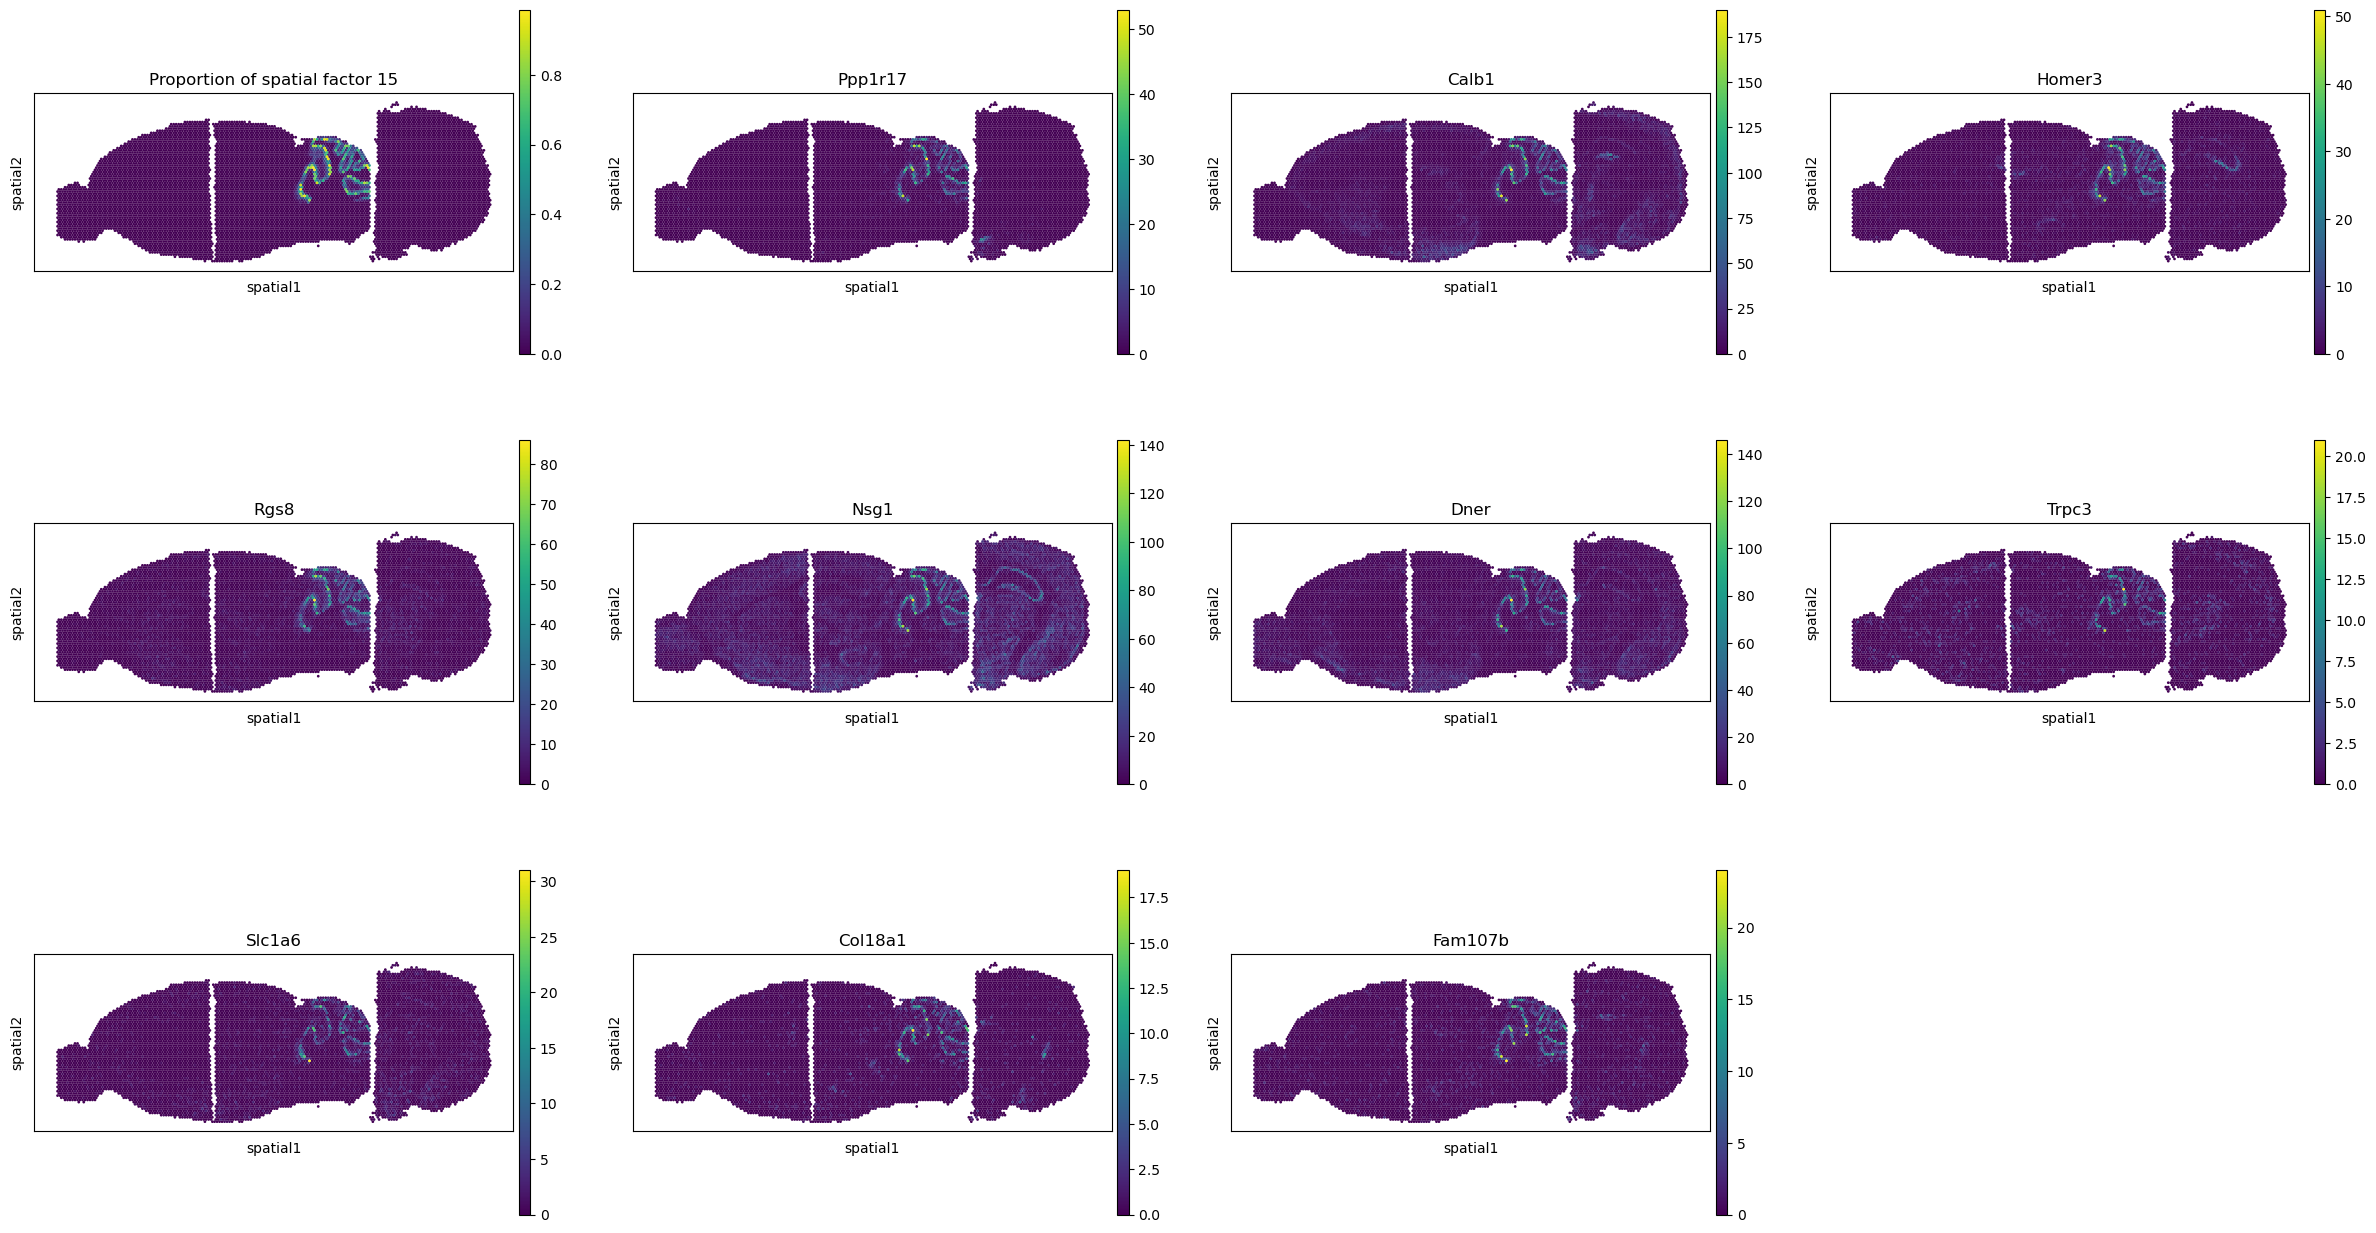

In [8]:
sc.pl.spatial(adata, color=["Proportion of spatial factor 15"]+marker_ours_14[:10], spot_size=150.)

In [9]:
factor_id = 16

factor_profile = np.array(basis_df.iloc[factor_id,:].values)
order = np.argsort(-factor_profile)

potential_marker = list(basis_df.columns[order[:50]])
marker_ours = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-basis_df[potential_marker[i]])[1]
    val_1 = basis_df[potential_marker[i]][id_1]
    val_2 = basis_df[potential_marker[i]][id_2]
    if (id_1 == factor_id) & (val_1 >= (val_2*1.5)):
        marker_ours.append(potential_marker[i])

marker_ours_16 = marker_ours

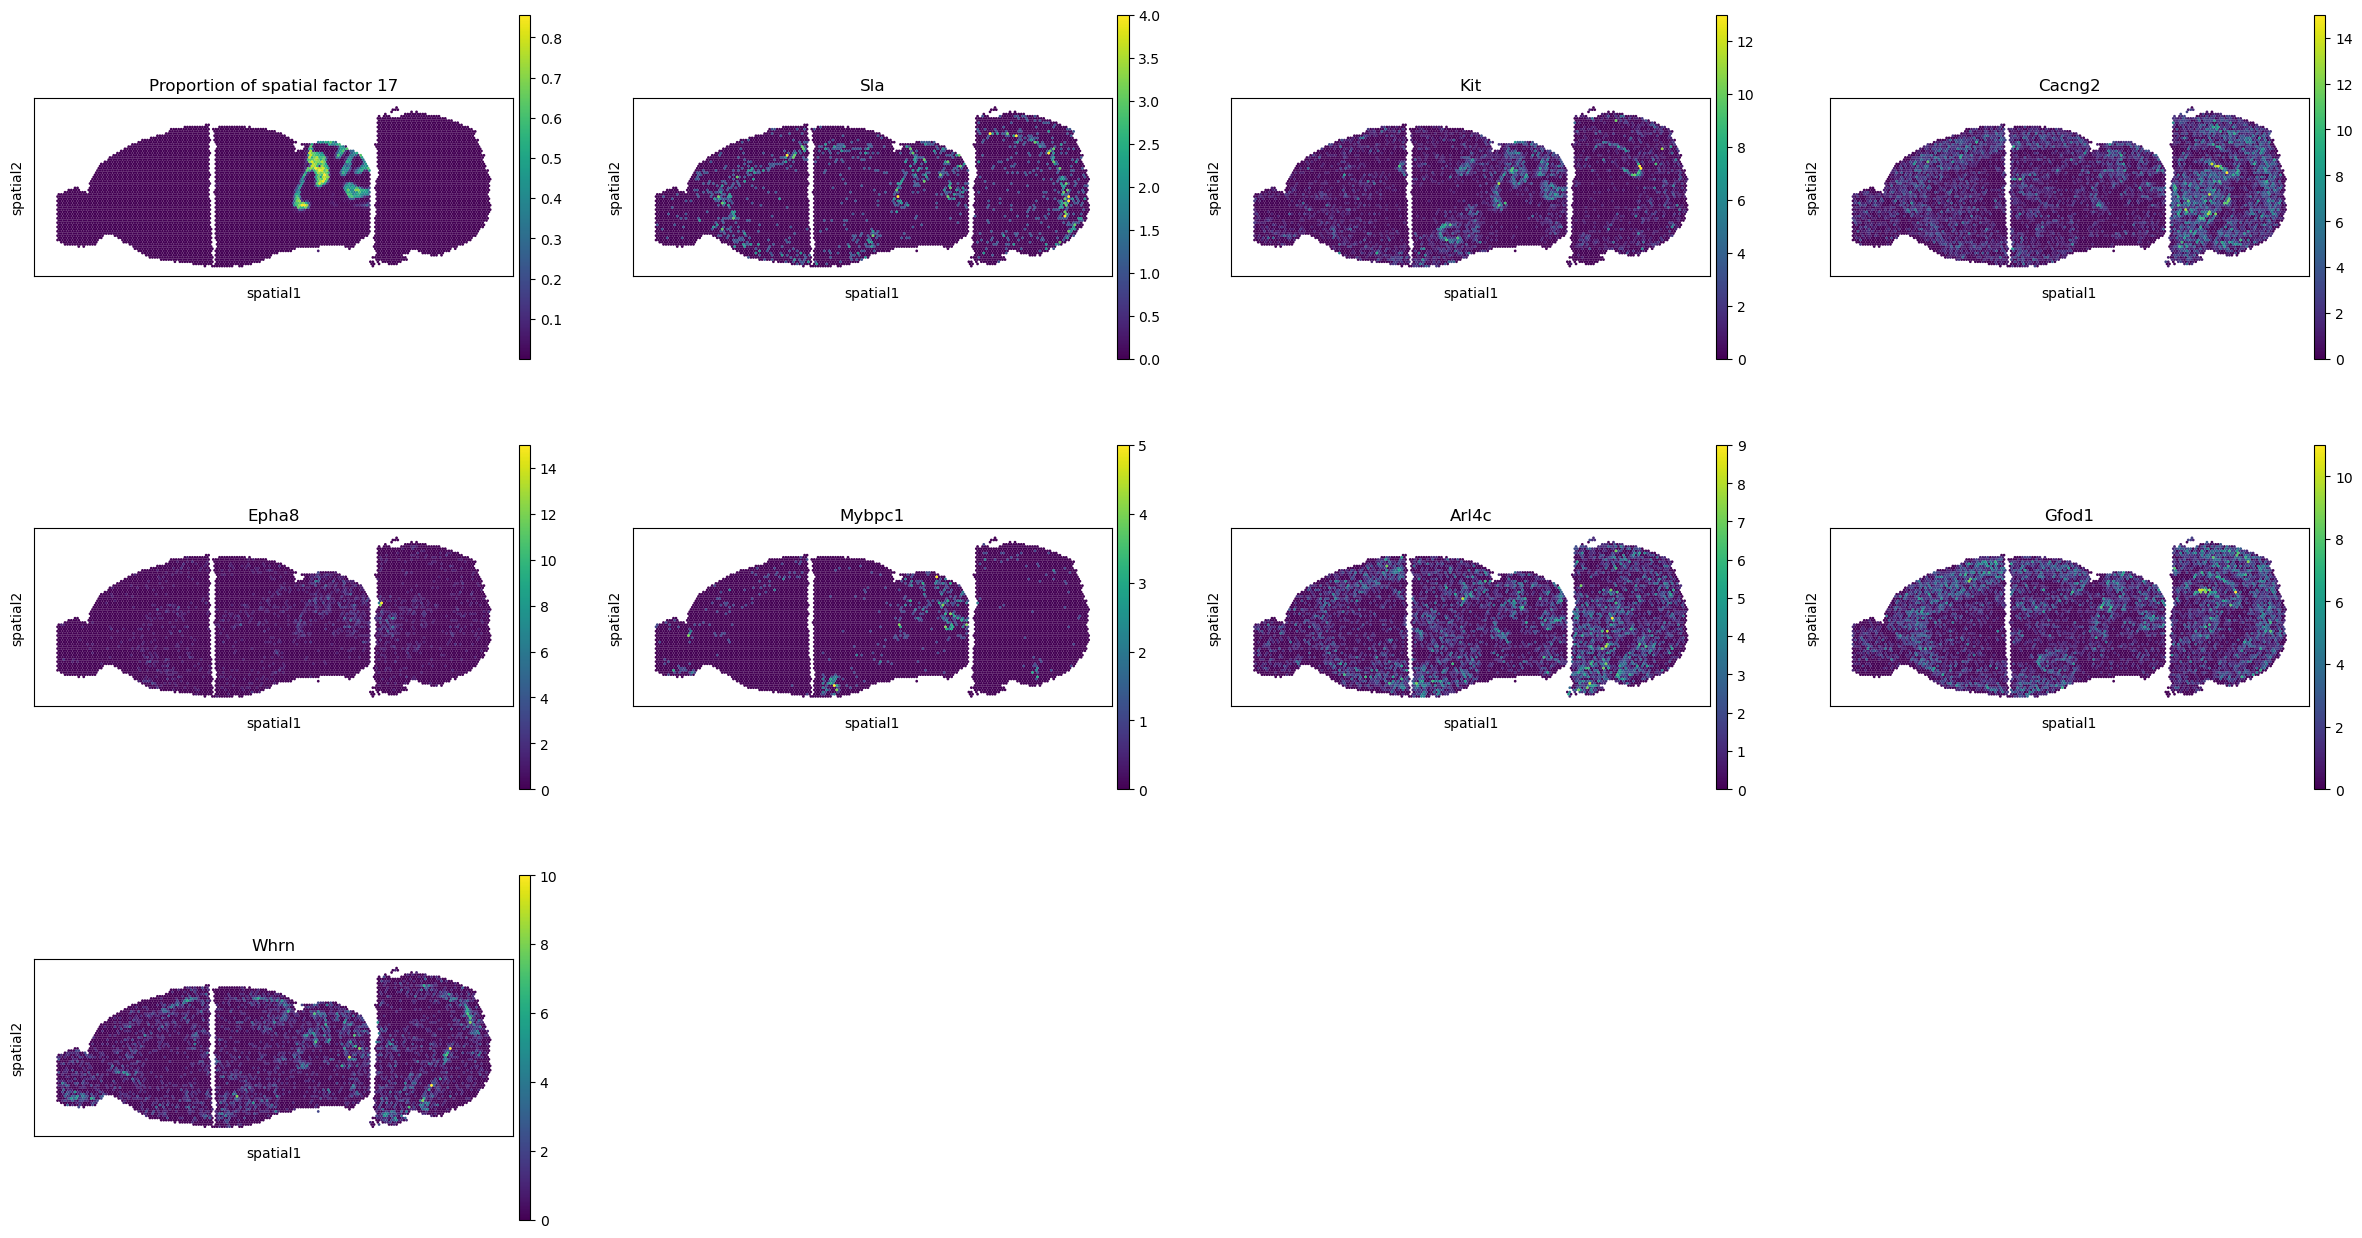

In [10]:
sc.pl.spatial(adata, color=["Proportion of spatial factor 17"]+marker_ours_16[:10], spot_size=150.)

In [11]:
factor_id = 24

factor_profile = np.array(basis_df.iloc[factor_id,:].values)
order = np.argsort(-factor_profile)

potential_marker = list(basis_df.columns[order[:50]])
marker_ours = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-basis_df[potential_marker[i]])[1]
    val_1 = basis_df[potential_marker[i]][id_1]
    val_2 = basis_df[potential_marker[i]][id_2]
    if (id_1 == factor_id) & (val_1 >= (val_2*1.5)):
        marker_ours.append(potential_marker[i])

marker_ours_24 = marker_ours

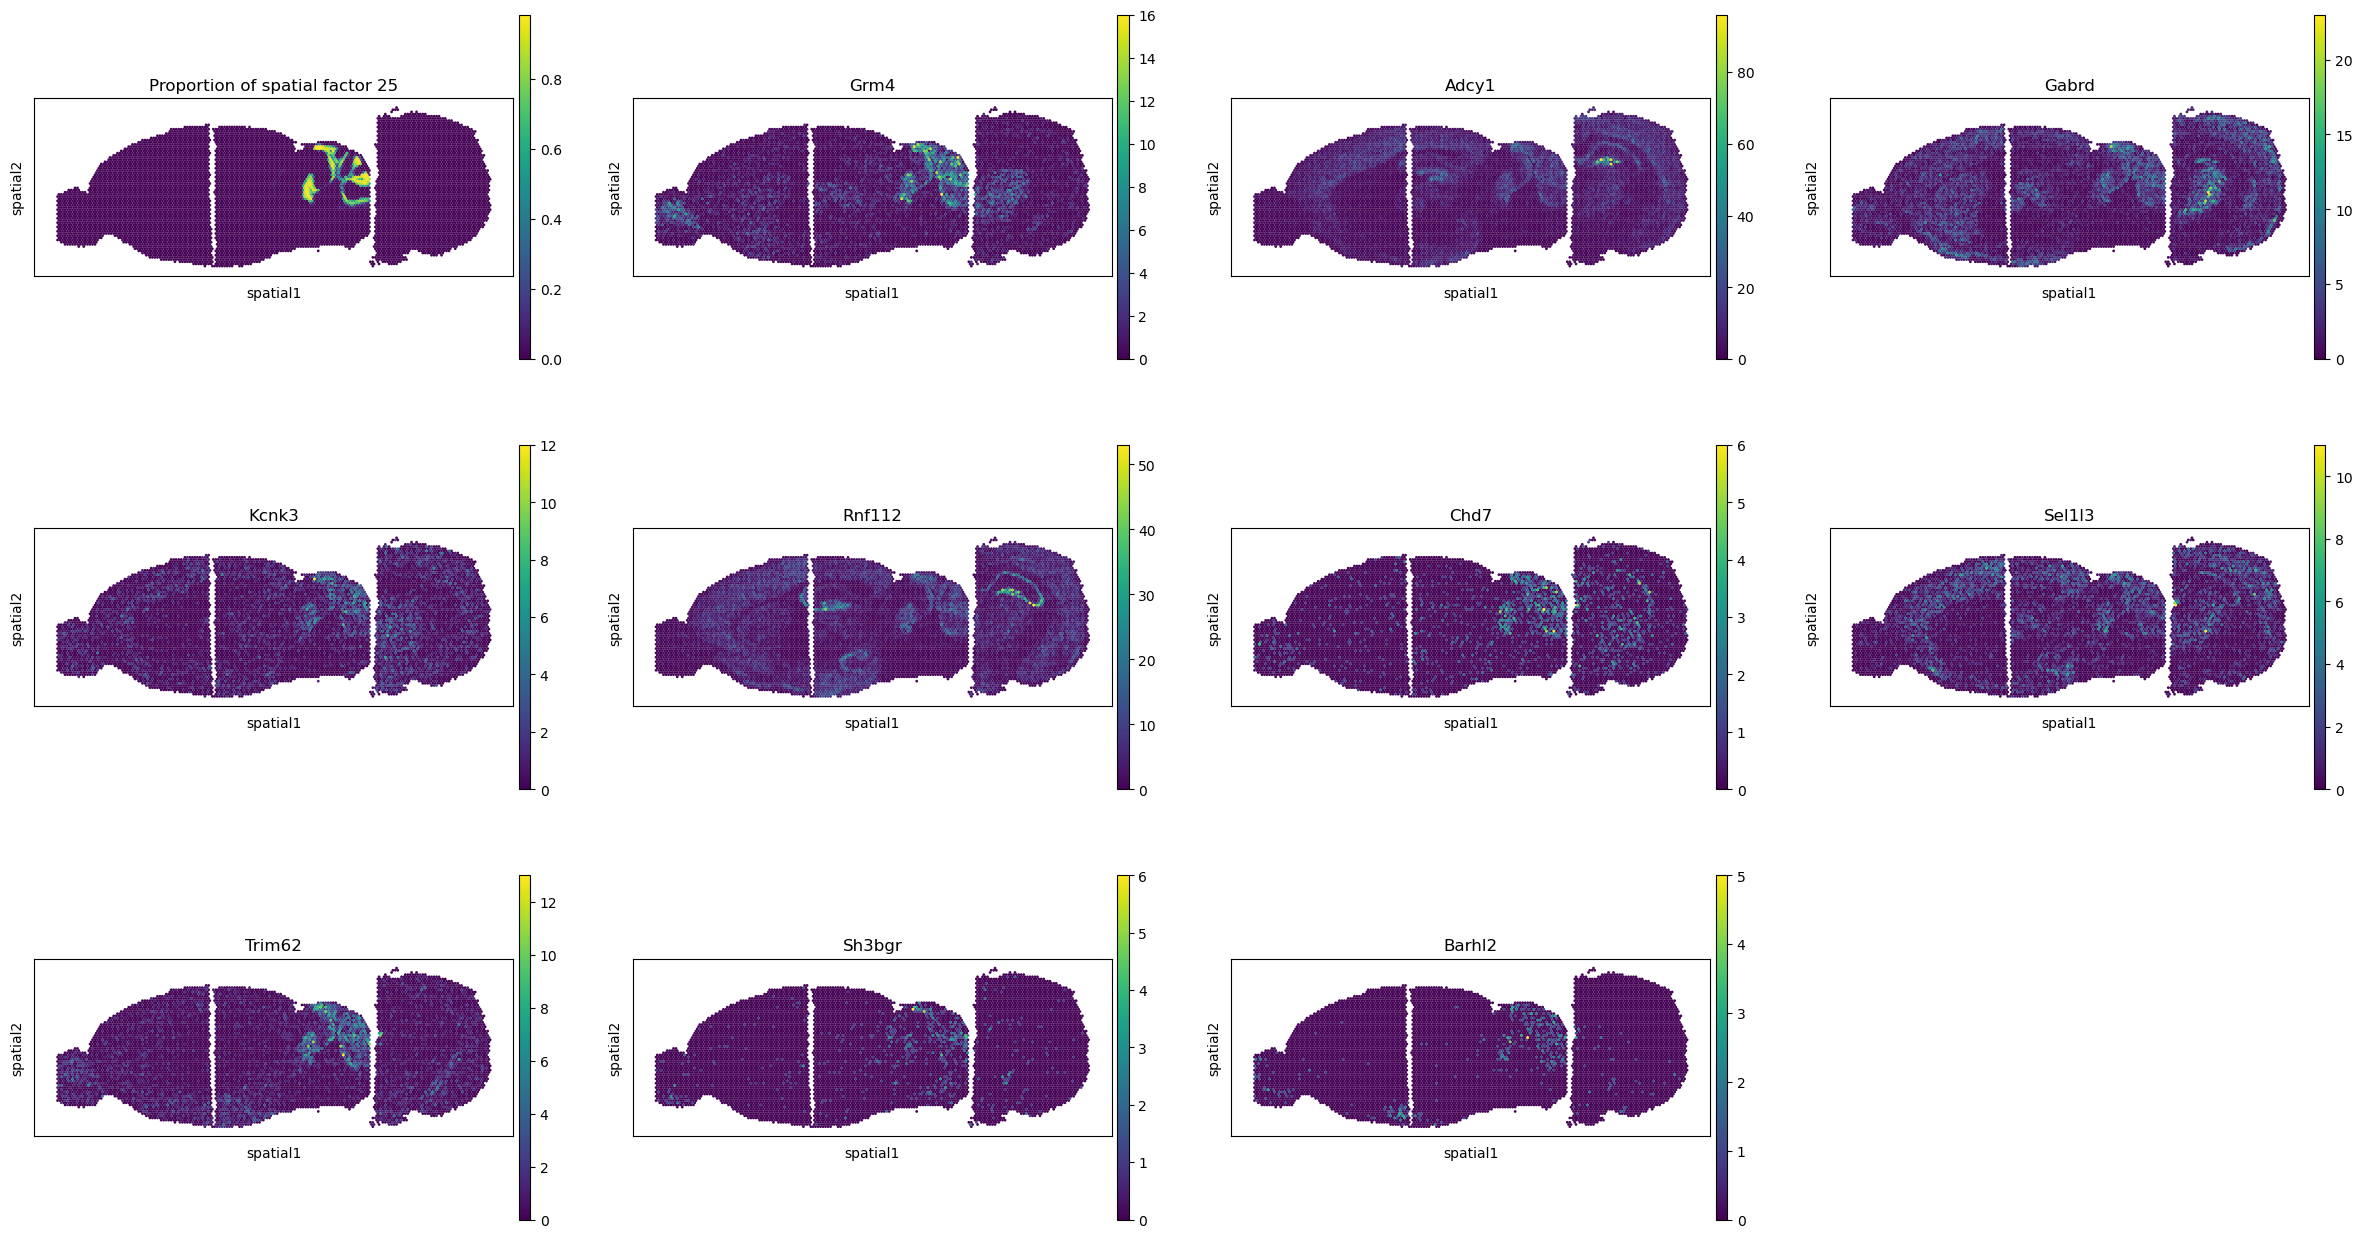

In [12]:
sc.pl.spatial(adata, color=["Proportion of spatial factor 25"]+marker_ours_24[:10], spot_size=150.)

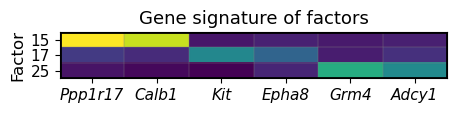

In [13]:
n_factors = 3
gene_set = ['Ppp1r17', 'Calb1',
            'Kit', 'Epha8',
            'Grm4', 'Adcy1']
profile = basis_df.iloc[[14,16,24], :]
profile = profile[gene_set]

f = plt.figure(figsize=(5,0.6))
ax = f.add_subplot(111)
ax.set_ylabel('Factor', fontsize=12)
im = ax.imshow(profile, cmap='viridis', interpolation='nearest', aspect='auto')
plt.yticks(np.arange(n_factors), [str(i+1) for i in [14,16,24]], rotation=0, fontsize=11)
plt.xticks(np.arange(len(gene_set)), gene_set, rotation=0, fontsize=11, style="italic")
plt.title("Gene signature of factors", fontsize=13)
plt.vlines(x=np.arange(len(gene_set))-0.5, ymin=-0.5, ymax=n_factors-0.5, color="gray", linewidth=1.5, alpha=0.2)
plt.hlines(y=np.arange(n_factors)-0.5, xmin=-0.5, xmax=len(gene_set)-0.5, color="gray", linewidth=1.5, alpha=0.2)
plt.vlines(x=-0.5, ymin=-0.5, ymax=n_factors-0.5, color="k", linewidth=2, alpha=1)
plt.vlines(x=len(gene_set)-0.5, ymin=-0.5, ymax=n_factors-0.5, color="k", linewidth=2, alpha=1)
plt.hlines(y=-0.5, xmin=-0.5, xmax=len(gene_set)-0.5, color="k", linewidth=2, alpha=1)
plt.hlines(y=n_factors-0.5, xmin=-0.5, xmax=len(gene_set)-0.5, color="k", linewidth=2, alpha=1)
plt.show()

In [14]:
adata_st2.obs["louvain"] = adata[adata_st2.obs.index, :].obs["louvain"].values.astype(str)
x_ref = adata_st2.obsm["spatial"][(adata_st2.obs["louvain"]=="2")|(adata_st2.obs["louvain"]=="17"), 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_ref = adata_st2.obsm["spatial"][(adata_st2.obs["louvain"]=="2")|(adata_st2.obs["louvain"]=="17"), 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
xmin_ref, xmax_ref = np.min(x_ref)-10, np.max(x_ref)+10
ymin_ref, ymax_ref = np.min(y_ref)-10, np.max(y_ref)+10

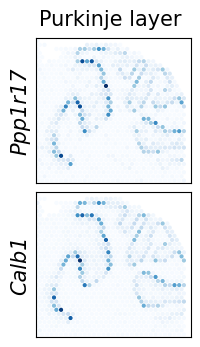

In [15]:
fig = plt.figure(figsize=(2,4))
size = 4.


g = "Ppp1r17"

ax1 = fig.add_subplot(2, 1, 1)
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st2[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin_ref, xmax_ref)
ax1.set_ylim(ymax_ref, ymin_ref)
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax1.set_ylabel(g, fontsize=15, style="italic")

g = "Calb1"

ax1 = fig.add_subplot(2, 1, 2)
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st2[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin_ref, xmax_ref)
ax1.set_ylim(ymax_ref, ymin_ref)
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax1.set_ylabel(g, fontsize=15, style="italic")

fig.suptitle("Purkinje layer", fontsize=15, y=0.94)
fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.show()

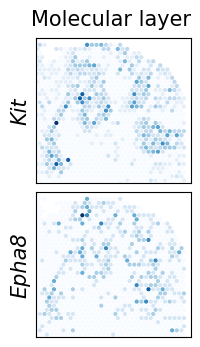

In [16]:
fig = plt.figure(figsize=(2,4))
size = 4.


g = "Kit"

ax1 = fig.add_subplot(2, 1, 1)
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st2[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin_ref, xmax_ref)
ax1.set_ylim(ymax_ref, ymin_ref)
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax1.set_ylabel(g, fontsize=15, style="italic")

g = "Epha8"

ax1 = fig.add_subplot(2, 1, 2)
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st2[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin_ref, xmax_ref)
ax1.set_ylim(ymax_ref, ymin_ref)
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax1.set_ylabel(g, fontsize=15, style="italic")

fig.suptitle("Molecular layer", fontsize=15, y=0.94)
fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.show()

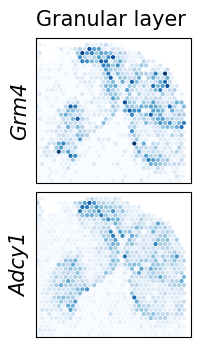

In [17]:
fig = plt.figure(figsize=(2,4))
size = 4.


g = "Grm4"

ax1 = fig.add_subplot(2, 1, 1)
# ax1.imshow(adata_st2.uns["spatial"][str(slice2_idx)]['images']['lowres'])
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st2[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin_ref, xmax_ref)
ax1.set_ylim(ymax_ref, ymin_ref)
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax1.set_ylabel(g, fontsize=15, style="italic")

g = "Adcy1"

ax1 = fig.add_subplot(2, 1, 2)
# ax1.imshow(adata_st2.uns["spatial"][str(slice2_idx)]['images']['lowres'])
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st2[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin_ref, xmax_ref)
ax1.set_ylim(ymax_ref, ymin_ref)
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax1.set_ylabel(g, fontsize=15, style="italic")

fig.suptitle("Granular layer", fontsize=15, y=0.94)
fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.show()